## Classic Activation Functions

### Step function

-An example of a simple activation function is the step or threshold activation function. In 1943, McCulloch and Pitts (https://link.springer.com/article/10.1007/BF02478259) presented the first perceptron and used a step activation function, which may be represented by the equation below.

𝑓(𝑥)={10if 𝑥>𝜃if 𝑥≤𝜃


This equation gives a value of 1.0 as an output when the input value is at or above the threshold value, and it gives a value of 0 for all other input values. As can be seen in the figure below, step functions, which are also known as threshold functions, will only return 1 (true) for values that are greater than the threshold that was given.

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


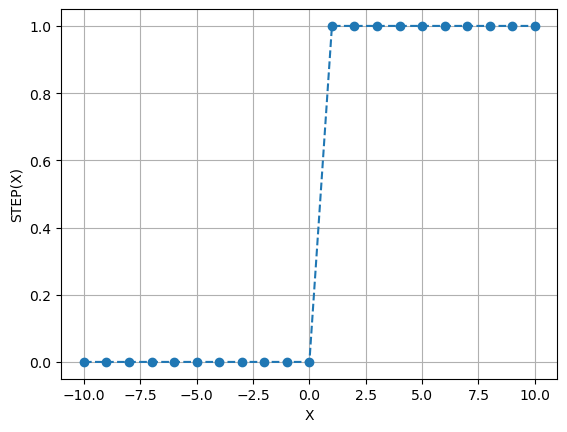

In [1]:
import matplotlib.pyplot as plt
import numpy as np
  
x = np.arange(-10, 11, 1)
print(x)
def plot_graph(y,ylabel):
    plt.figure()
    plt.plot(x,y, 'o--')
    plt.grid(True)
    plt.xlabel("X")
    plt.ylabel(ylabel)
    plt.show()
y = list(map(lambda n: 1 if n>0.5 else 0, x))
plot_graph(y,"STEP(X)")

### Sigmoid or Logistic Activation Function


The sigmoid non-linearity has the mathematical form as bellow.

$$ \sigma (x) =  \frac{1}{1 + e^ \left(-x \right)} $$ 

it takes a real-valued number and **squashes** it into range between __0 and 1__. Therefore, it is especially used for models where we have to predict the probability as an output. Since probability of anything exists only between the range of 0 and 1, sigmoid is the good choice.

In particular, large negative numbers become 0 and large positive numbers become 1. The sigmoid function has seen frequent use historically. The sigmoid non-linearity has recently fallen out of favor and it is rarely ever used - because of the following drawbacks:

- Vanishing gradient—for very high or very low values of X, there is almost no change to the prediction, causing a vanishing gradient problem. This can result in the network refusing to learn further, or being too slow to reach an accurate prediction.
- Outputs not zero centered.
- Computationally expensive


The Sigmoid Function curve looks like a S-shape.



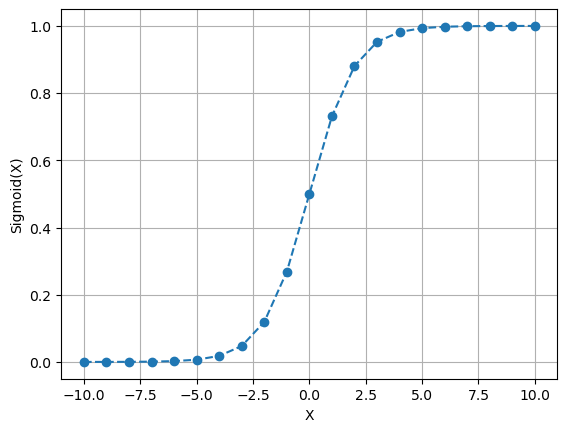

In [2]:
y = 1 / (1 + np.exp(-x))
plot_graph(y, "Sigmoid(X)")

### Tanh

The hyperbolic tangent function is also a prevalent activation function for neural networks that must output values in the range between __-1 and 1__. This activation function is simply the hyperbolic tangent (tanh) function, as shown in the following equation:

$$ 
\begin{split}
            tanh(x) & = \frac{e^x - e^{-x}}{e^x + e^{-x}} \\
                    & = \frac{e^{2x} - 1}{e^{2x} + 1}
\end{split}                  
$$


Like the sigmoid neuron, its activations saturate, but unlike the sigmoid neuron its output is zero-centered. Therefore, in practice the tanh non-linearity is always preferred to the sigmoid nonlinearity. Also note that the tanh neuron is simply a scaled sigmoid neuron, in particular the following holds: 

$$ tanh(x) = 2 \sigma \left( 2x \right) -1 $$

As for Sigmoid, Tanh is highly compute-intensive and suffers from saturation problem and thus vanishing gradient. In fact, when the neuron reaches the minimum or maximum value of its range, that respectively correspond to -1 and 1, its derivative is equal to 0.

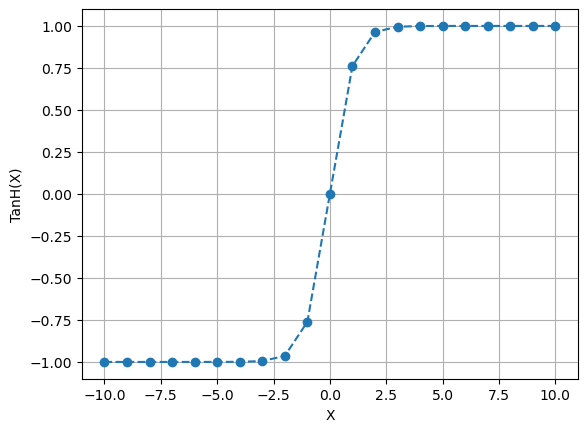

In [3]:
y = (np.exp(2*x) - 1) / (np.exp(2*x) + 1)
plot_graph(y, "TanH(X)")

### Rectified Linear Units (ReLU)

The rectified linear unit (ReLU) [[@teh2001rate]](https://www.cs.toronto.edu/~hinton/absps/nips00-ywt.pdf) was introduced by Teh & Hinton in 2001. The Rectified Linear Unit has become very popular in the last few years. The following equation shows the straightforward ReLU function:


$$ f(x) = max(0,x) $$

In other words, the activation is simply thresholded at zero

$$
f(x) =
  \begin{cases}
    x       & \quad \text{if } x \geq 0 \\
    0       & \quad \text{if } x < 0
  \end{cases} 
$$

There are several pros and cons to using the ReLUs:

- It was found to greatly accelerate (e.g. a factor of 6 [[@krizhevsky2012imagenet]](http://www.cs.toronto.edu/~fritz/absps/imagenet.pdf) ) the convergence of stochastic gradient descent compared to the sigmoid/tanh functions. It is argued that this is due to its linear, non-saturating form.

- Compared to tanh/sigmoid neurons that involve expensive operations (exponentials, etc.), the ReLU can be implemented by simply thresholding a matrix of activations at zero.

- But the issue is that all the negative values become zero immediately which decreases the ability of the model to fit or train from the data properly. That means any negative input given to the ReLU activation function turns the value into zero immediately in the graph, which in turns affects the resulting graph by not mapping the negative values appropriately.




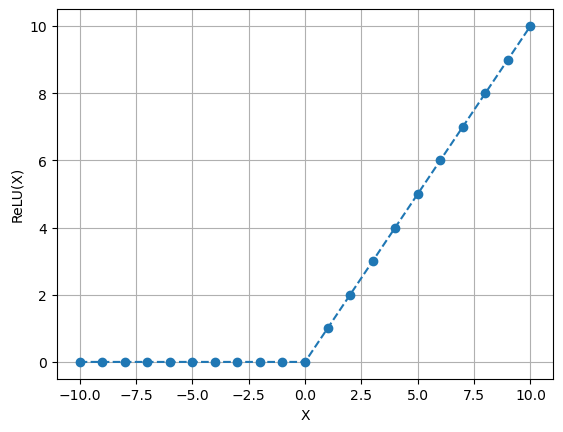

In [4]:
y = list(map(lambda a: a if a>=0 else 0, x))
plot_graph(y,"ReLU(X)")

### ELU Function
In neural networks, one sort of activation function that is often used is known as the Exponential Linear Unit (ELU) function. It is comparable to other activation functions like the sigmoid and rectified linear unit (ReLU) functions, however it has a few characteristics that are not seen in those other functions.

The ELU function may be defined in the following way:

$$
f(x) =
  \begin{cases}
    x       & \quad \text{if } x > 0 \\
    ∝(e^x-1)       & \quad \text{if } x < 0
  \end{cases} 
$$

Where alpha is a positive and very tiny constant that is often equal to 1. This function ensures a seamless and uninterrupted shift from negative to positive numbers by providing such a transition. It is comparable to the ReLU function for positive inputs, but it includes a non-zero output for negative inputs, which may assist to avoid "dead" neurons from forming in the neural network.


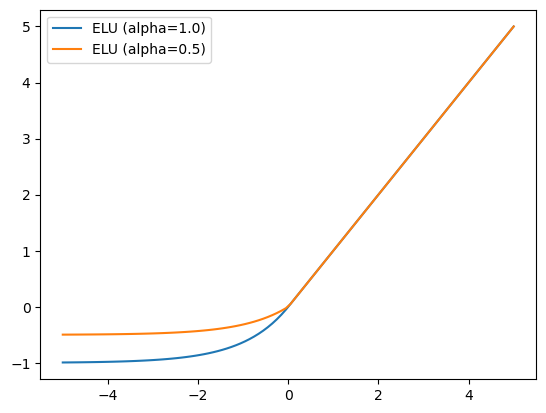

In [5]:
x = np.linspace(-5, 5, 100)
plt.plot(x, np.where(x > 0, x, 1.0 * (np.exp(x) - 1)), label="ELU (alpha=1.0)")
plt.plot(x, np.where(x > 0, x, 0.5 * (np.exp(x) - 1)), label="ELU (alpha=0.5)")

plt.legend()
plt.show()

### Selu Function

Deep neural networks make use of an activation function known as the Scaled Exponential Linear Unit (SELU) function. This particular form of activation function is utilized to train neural networks. It is a modification of the Exponential Linear Unit (ELU) function, and it was first presented in a work written by Klambauer and colleagues in the year 2017.

The following is a definition of the SELU function:

$$ f(x) = \lambda
  \begin{cases}
    x       & \quad \text{if } x \geq 0 \\
    \alpha(e^x -1)       & \quad \text{if } x < 0
  \end{cases} $$
  
In this equation, alpha is a tiny positive constant that is often fixed to 1.67326, and scale is a normalization constant that varies depending on the input distribution of the activation function. In order to stabilize the output of the network while it is being trained, the normalization constant, which is computed by setting the mean and variance of the input to zero and one respectively, respectively, is used.

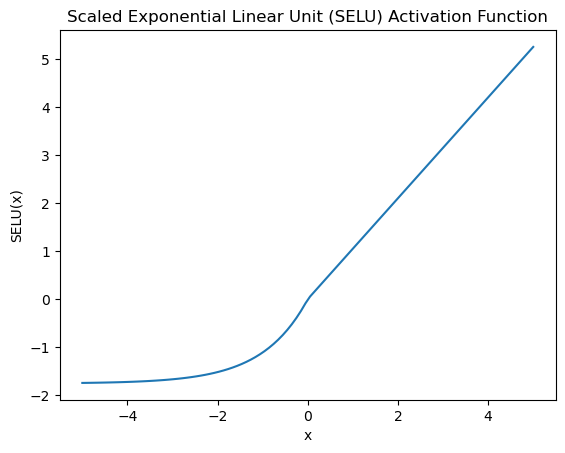

In [6]:
x = np.linspace(-5, 5, 100)
plt.plot(x, 1.0507 * np.where(x > 0, x, 1.67326 * (np.exp(x) - 1)))

plt.xlabel("x")
plt.ylabel("SELU(x)")
plt.title("Scaled Exponential Linear Unit (SELU) Activation Function")
plt.show()